# <font color='Blue'>**Bike Sharing Assignment**</font>

#### The company requires to model the demand for shared bikes with the available independent variables. 
#### It will be used by the management to understand how exactly the demands vary with different features. 
#### They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
#### Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Import Required Packages

In [764]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [765]:
bike = pd.read_csv("day.csv")

## Data Understanding and Cleaning

In [766]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [767]:
bike.shape

(730, 16)

In [768]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Column dteday is read as type object... We can convert it to datetime.

In [769]:
#Converting dteday to datetime
bike['dteday'] = pd.to_datetime(bike['dteday'])

In [770]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [771]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [772]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike.index)), 2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### From the above it is evident that there are no null values.

In [773]:
#Use a duplicate Dataframe for Analysis and model building purposes
bike_df=bike

### Removing Unwanted Columns

In [774]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

##### From above list of columns, let us figure out the columns that have to be dropped:
#####      instant- can be dropped as it is a index value column
#####      dteday- can be dropped as we have a year and month column showing the same data
#####      casual- can be dropped as 'cnt' is our Target variable.
#####      registered- can be dropped as 'cnt' is our Target variable.
#####      holiday- can be dropped as workingday column provides us with reqd data

In [775]:
#Set the year and month values using dteday before dropping
#bike_df['yr'] = pd.DatetimeIndex(bike_df['dteday']).year
#bike_df['mnth'] = pd.DatetimeIndex(bike_df['dteday']).month

In [776]:
#dropping the above mentioned columns
bike_df.drop(['instant','dteday','casual','registered','holiday'],axis=1,inplace=True)

In [777]:
bike_df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Encoding the Labels & Visualization of the data wrt. Target variable

#### For column-season
    1:spring
    2:summer
    3:fall
    4:winter

In [778]:
#Mapping the labels
ssn_codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bike_df['season'] = bike_df['season'].map(ssn_codes)
bike_df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


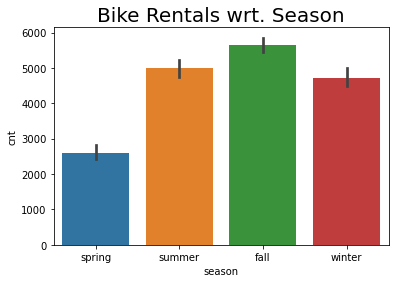

In [779]:
plot1=sns.barplot(x='season',y='cnt',data=bike_df)
plt.title("Bike Rentals wrt. Season",fontsize=20)
plt.show()

##### We can conclude that maximum rentals are during Fall Season

#### For column-Weathersit
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [780]:
ws_codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bike_df['weathersit'] = bike_df['weathersit'].map(ws_codes)
bike_df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


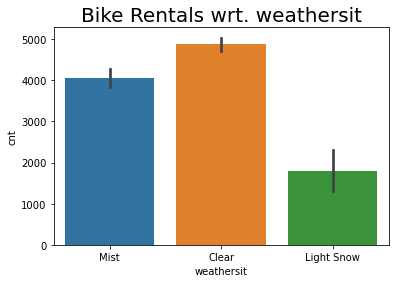

In [781]:
plot2=sns.barplot(x='weathersit',y='cnt',data=bike_df)
plt.title("Bike Rentals wrt. weathersit",fontsize=20)
plt.show()

##### We can conclude that maximum rentals are during Clear/Partly cloudy weather

#### For Column-Working_day
    1-Working
    0-Holiday

In [782]:
wd_codes = {1:'Working',0:'Holiday'}
bike_df['workingday'] = bike_df['workingday'].map(wd_codes)
bike_df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,6,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,1,Working,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,2,Working,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,3,Working,Clear,9.305237,11.46350,43.6957,12.522300,1600


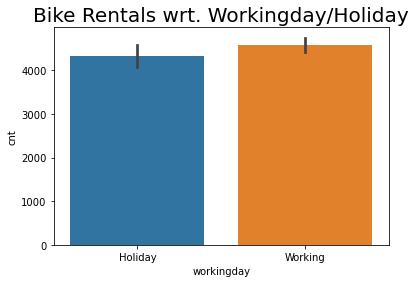

In [783]:
plot3=sns.barplot(x='workingday',y='cnt',data=bike_df)
plt.title("Bike Rentals wrt. Workingday/Holiday",fontsize=20)
plt.show()

##### We can conclude that maximum rentals are on Working Days

#### For Column-mnth
    1:Jan
    2:Feb
    3:Mar
    4:Apr
    5:May
    6:June
    7:July
    8:Aug
    9:Sep
    10:Oct
    11:Nov
    12:Dec

In [784]:
mon_codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike_df['mnth'] = bike_df['mnth'].map(mon_codes)
bike_df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,6,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,1,Working,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,2,Working,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,3,Working,Clear,9.305237,11.46350,43.6957,12.522300,1600


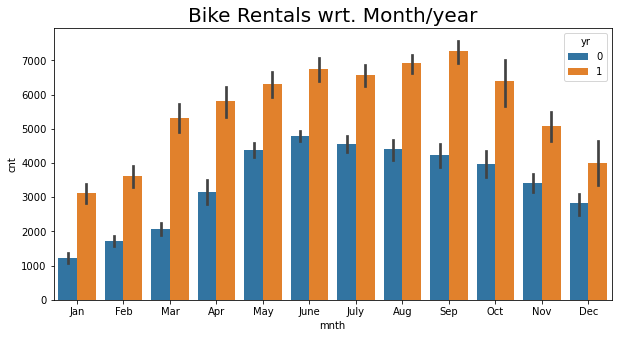

In [785]:
plt.figure(figsize=(10,5))
plot4=sns.barplot(x='mnth',y='cnt',hue='yr',data=bike_df)
plt.title("Bike Rentals wrt. Month/year",fontsize=20)
plt.show()

In [786]:
day_codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike_df['weekday'] = bike_df['weekday'].map(day_codes)
bike_df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,Sun,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,Mon,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,Tue,Working,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,Wed,Working,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,Thu,Working,Clear,9.305237,11.46350,43.6957,12.522300,1600


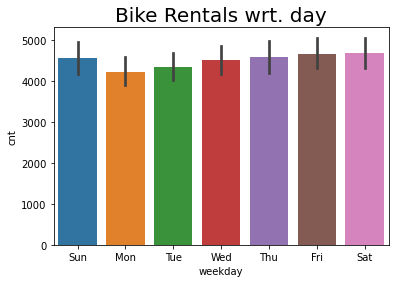

In [789]:
plot5=sns.barplot(x='weekday',y='cnt',data=bike_df)
plt.title("Bike Rentals wrt. day",fontsize=20)
plt.show()

#### Analysis of Numerical columns

In [790]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   weekday     730 non-null    object 
 4   workingday  730 non-null    object 
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 62.9+ KB


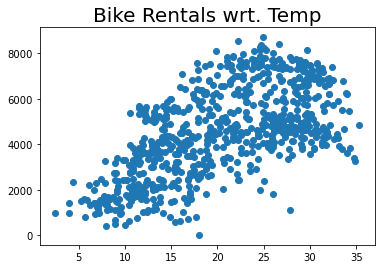

In [791]:
plot6=plt.scatter(x='temp',y='cnt',data=bike_df)
plt.title("Bike Rentals wrt. Temp",fontsize=20)
plt.show()

##### We can conclude that maximum rentals are during Higher Temperatures

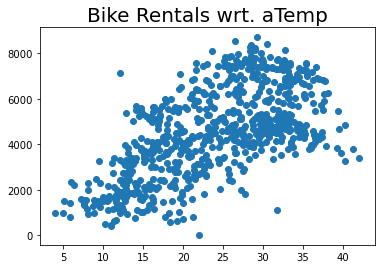

In [792]:
plot7=plt.scatter(x='atemp',y='cnt',data=bike_df)
plt.title("Bike Rentals wrt. aTemp",fontsize=20)
plt.show()

##### We can conclude that maximum rentals are during Higher feeling Temperatures

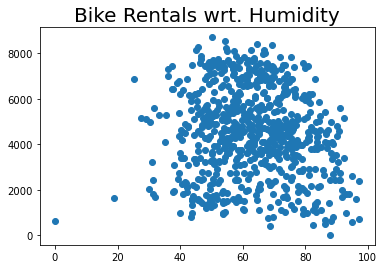

In [793]:
plot8=plt.scatter(x='hum',y='cnt',data=bike_df)
plt.title("Bike Rentals wrt. Humidity",fontsize=20)
plt.show()

##### We can conclude that maximum rentals are during High Humidity

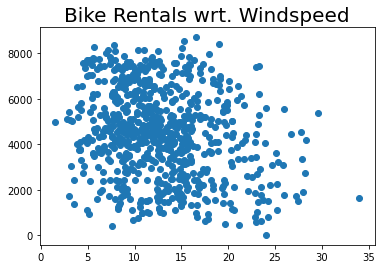

In [794]:
plot9=plt.scatter(x='windspeed',y='cnt',data=bike_df)
plt.title("Bike Rentals wrt. Windspeed",fontsize=20)
plt.show()

##### We can conclude that Wind speeds increase with a greater temperature difference.Wind speed near the surface is most highly correlated with the temperature

### Visualizing the Relationship among variables

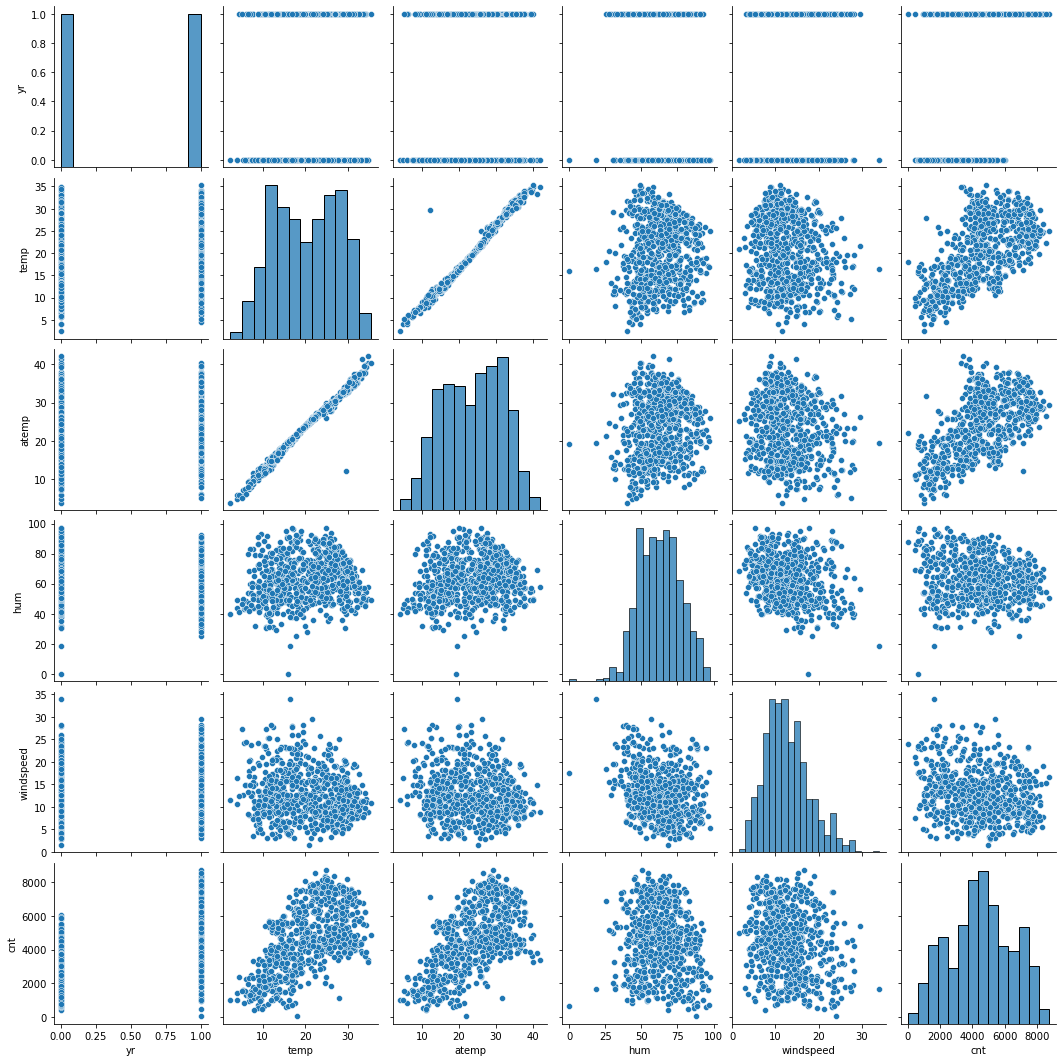

In [795]:
plot10=sns.pairplot(bike_df)
plt.show()

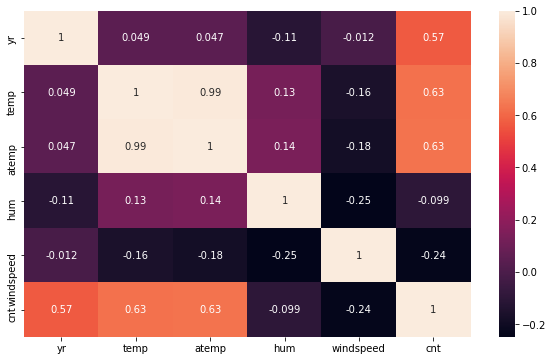

In [796]:
plt.figure(figsize = (10,6))
plot11=sns.heatmap(bike_df.corr(),annot=True)
plt.show()

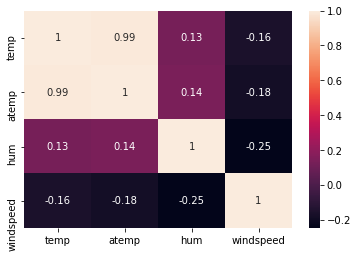

In [797]:
num_bike= bike[['temp','atemp','hum','windspeed']]
plot12=sns.heatmap(num_bike.corr(),annot=True)
plt.show()

##### As the correlation between temp and atemp is high, we can choose to drop any one of the columns. Let us drop the 'atemp' column

In [798]:
bike_df.drop('atemp',axis=1,inplace=True)

In [799]:
bike_df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,Sun,Holiday,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,Mon,Holiday,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,Tue,Working,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,Wed,Working,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,Thu,Working,Clear,9.305237,43.6957,12.522300,1600


## Creating Dummy variables

In [800]:
ssn = pd.get_dummies(bike_df['season'],drop_first=True)
wrkday = pd.get_dummies(bike_df['workingday'],drop_first=True)
weather= pd.get_dummies(bike_df['weathersit'],drop_first=True)
mon= pd.get_dummies(bike_df['mnth'],drop_first=True)
week_day= pd.get_dummies(bike_df['weekday'],drop_first=True)

In [801]:
bike_df= pd.concat([bike_df,ssn,wrkday,weather,mon,week_day],axis=1)
bike_df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,Sun,Holiday,Mist,14.110847,80.5833,10.749882,985,...,0,0,0,0,0,0,1,0,0,0
1,spring,0,Jan,Mon,Holiday,Mist,14.902598,69.6087,16.652113,801,...,0,0,0,0,1,0,0,0,0,0
2,spring,0,Jan,Tue,Working,Clear,8.050924,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,1,0
3,spring,0,Jan,Wed,Working,Clear,8.200000,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,1
4,spring,0,Jan,Thu,Working,Clear,9.305237,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,1,0,0


In [802]:
#Dropping the categorical variables as they are already dummy-encoded.
bike_df.drop(['season','workingday','weathersit','weekday','mnth'],axis=1,inplace=True)

In [803]:
bike_df.head()

,yr,temp,hum,windspeed,cnt,spring,summer,winter,Working,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,8.050924,43.7273,16.636703,1349,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,8.200000,59.0435,10.739832,1562,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,9.305237,43.6957,12.522300,1600,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Creating Training and testing split

In [804]:
bike_df.shape

(730, 28)

In [805]:
# We specify 'random_state' so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.70, test_size = 0.30, random_state = 100)

In [806]:
df_train.shape

(510, 28)

In [807]:
df_test.shape

(219, 28)

## Feature Rescaling

In [808]:
bike_num=df_train[[ 'temp', 'hum', 'windspeed','cnt']]
num_vars = ['temp', 'hum', 'windspeed','cnt']

In [809]:
scaler= MinMaxScaler()

In [810]:
# Apply scaler() to all the numeric variables
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [811]:
# Checking the values after scaling
df_train.head()

,yr,temp,hum,windspeed,cnt,spring,summer,winter,Working,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0.509887,0.575354,0.300794,0.864243,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [812]:
df_train.describe()

,yr,temp,hum,windspeed,cnt,spring,summer,winter,Working,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.676471,0.029412,...,0.084314,0.086275,0.086275,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373
std,0.500429,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.468282,0.169124,...,0.278131,0.281045,0.281045,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building a Linear Model

## Dividing into X and Y sets for the model building

In [813]:
y_train = df_train.pop('cnt')
X_train = df_train

## Using Recursive feature elimination(RFE) for automated Feature Selection approach

In [814]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [815]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10) #running RFE
rfe = rfe.fit(X_train, y_train)

In [816]:
rfe_df = pd.DataFrame({'rank' : rfe.ranking_, 'support': rfe.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_df

,rank,support,features
0,1,True,yr
1,1,True,temp
2,1,True,hum
3,1,True,windspeed
4,1,True,spring
8,1,True,Light Snow
9,1,True,Mist
23,1,True,Sun
20,1,True,Sep
14,1,True,July


In [817]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'hum', 'windspeed', 'spring', 'Light Snow', 'Mist',
       'July', 'Sep', 'Sun'],
      dtype='object')

In [818]:
X_train.columns[~rfe.support_]

Index(['summer', 'winter', 'Working', 'Aug', 'Dec', 'Feb', 'Jan', 'June',
       'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sat', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [819]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [820]:
X_train_rfe.shape

(510, 10)

## Building Stats Model

In [821]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [822]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [823]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.6
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          4.33e-184
Time:                        22:05:27   Log-Likelihood:                 488.62
No. Observations:                 510   AIC:                            -955.2
Df Residuals:                     499   BIC:                            -908.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3766      0.030     12.421      0.000       0.317       0.436
yr             0.2332      0.008     27.653      0.000       0.217       0.250
temp           0.4091      0.027     15.413      0.000       0.357       0.461
hum           -0.1247      0.038     -3.244      0.001      -0.200      -0.049
windspeed     -0.1802      0.026     -6.805      0.000      -0.232      -0.128
spring        -0.1483      0.012    -11.944      0.000      -0.173      -0.124
Light Snow    -0.2402      0.027     -8.778      0.000      -0.294      -0.186
Mist          -0.0607      0.011     -5.610      0.000      -0.082      -0.039
July          -0.0794      0.018     -4.464      0.000      -0.114      -0.044
Sep            0.0553      0.016      3.445      0.001       0.024       0.087
Sun            0.0212      0.012      1.842      0.066      -0.001       0.044
==============================================================================
Omnibus:                       59.213   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.976
Skew:                          -0.640   Prob(JB):                     5.97e-29
Kurtosis:                       5.116   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Dropping the 'Sun' column as its p-value is greater than 0.05

In [824]:
X_train1= X_train_rfe.drop('Sun',1)

In [825]:
X_train2= sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train2).fit()

In [826]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     266.8
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.39e-184
Time:                        22:05:27   Log-Likelihood:                 486.89
No. Observations:                 510   AIC:                            -953.8
Df Residuals:                     500   BIC:                            -911.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3823      0.030     12.642      0.000       0.323       0.442
yr             0.2327      0.008     27.541      0.000       0.216       0.249
temp           0.4079      0.027     15.336      0.000       0.356       0.460
hum           -0.1281      0.039     -3.326      0.001      -0.204      -0.052
windspeed     -0.1789      0.027     -6.742      0.000      -0.231      -0.127
spring        -0.1485      0.012    -11.934      0.000      -0.173      -0.124
Light Snow    -0.2386      0.027     -8.702      0.000      -0.292      -0.185
Mist          -0.0600      0.011     -5.534      0.000      -0.081      -0.039
July          -0.0789      0.018     -4.426      0.000      -0.114      -0.044
Sep            0.0556      0.016      3.454      0.001       0.024       0.087
==============================================================================
Omnibus:                       53.449   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.640
Skew:                          -0.557   Prob(JB):                     3.17e-28
Kurtosis:                       5.173   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### We can conclude from the above that all variables have p-value less than 0.05

In [827]:
X_train_1= X_train2.drop('const',axis=1)

## Checking Variance Inflation Factor(VIF)

In [828]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,14.88
1,temp,11.88
3,windspeed,3.94
6,Mist,2.10
0,yr,2.03
4,spring,1.84
7,July,1.40
5,Light Snow,1.20
8,Sep,1.20


#### Dropping the column hum as it has the highest VIF

In [829]:
X_train_new = X_train_1.drop(["hum"], axis = 1)

In [830]:
#Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.60
2,windspeed,3.81
0,yr,2.03
3,spring,1.52
5,Mist,1.48
6,July,1.33
7,Sep,1.20
4,Light Snow,1.06


#### Now all the variables have VIF less than 5

In [831]:
X_train_final= sm.add_constant(X_train_new)
lm_fin = sm.OLS(y_train,X_train_final).fit()

In [832]:
lm_fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     292.9
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.84e-183
Time:                        22:05:27   Log-Likelihood:                 481.31
No. Observations:                 510   AIC:                            -944.6
Df Residuals:                     501   BIC:                            -906.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3038      0.019     15.890      0.000       0.266       0.341
yr             0.2356      0.008     27.744      0.000       0.219       0.252
temp           0.3937      0.027     14.849      0.000       0.342       0.446
windspeed     -0.1525      0.026     -5.962      0.000      -0.203      -0.102
spring        -0.1460      0.013    -11.638      0.000      -0.171      -0.121
Light Snow    -0.2748      0.025    -10.818      0.000      -0.325      -0.225
Mist          -0.0804      0.009     -8.896      0.000      -0.098      -0.063
July          -0.0727      0.018     -4.058      0.000      -0.108      -0.037
Sep            0.0531      0.016      3.268      0.001       0.021       0.085
==============================================================================
Omnibus:                       56.658   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.747
Skew:                          -0.593   Prob(JB):                     1.49e-29
Kurtosis:                       5.200   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### All variables have a p-value<0.05 and the r2 value is 0.82-which represents a good model

## Residual Analysis of the Train Data

In [833]:
y_train_pred = lm1.predict(X_train2)

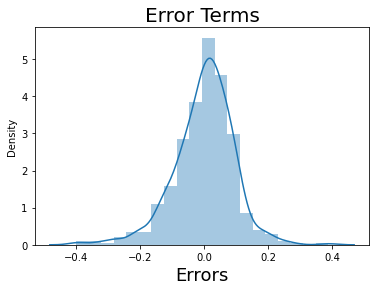

In [834]:
#Plot Error Terms 
sns.distplot((y_train - y_train_pred), bins = 20)
plot13=plt.title('Error Terms', fontsize = 20)       
plt.xlabel('Errors', fontsize = 18)    
plt.show()

#### Residual errors follow a normal distribution with mean=0

## Making Predictions on the Model

In [835]:
df_test[num_vars]= scaler.transform(df_test[num_vars])
y_test = df_test.pop('cnt')
X_test = df_test

In [836]:
X_test_new = X_test[X_train_new.columns]

In [837]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [838]:
X_test_new.head()

,const,yr,temp,windspeed,spring,Light Snow,Mist,July,Sep
184,1.0,0,0.831783,0.084219,0,0,1,1,0
535,1.0,1,0.901354,0.153728,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,0,1,0,0
221,1.0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0,0,0


In [839]:
lm_test = sm.OLS(y_test,X_test_new).fit()

In [840]:
lm_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     113.0
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           8.66e-72
Time:                        22:05:28   Log-Likelihood:                 205.66
No. Observations:                 219   AIC:                            -393.3
Df Residuals:                     210   BIC:                            -362.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3057      0.030     10.031      0.000       0.246       0.366
yr             0.2438      0.013     18.437      0.000       0.218       0.270
temp           0.3503      0.043      8.190      0.000       0.266       0.435
windspeed     -0.0652      0.043     -1.521      0.130      -0.150       0.019
spring        -0.1889      0.020     -9.236      0.000      -0.229      -0.149
Light Snow    -0.2365      0.042     -5.661      0.000      -0.319      -0.154
Mist          -0.0645      0.014     -4.522      0.000      -0.093      -0.036
July          -0.0519      0.025     -2.061      0.041      -0.102      -0.002
Sep            0.0411      0.024      1.693      0.092      -0.007       0.089
==============================================================================
Omnibus:                       20.872   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.586
Skew:                          -0.711   Prob(JB):                     4.58e-06
Kurtosis:                       3.820   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [841]:
# Making predictions
y_test_pred = lm_test.predict(X_test_new)

## Model Evaluation

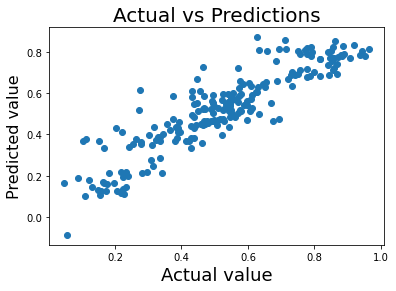

In [842]:
# Plotting y_test and y_pred to understand the spread.
plot14=plt.scatter(y_test,y_test_pred)
plt.title('Actual vs Predictions', fontsize=20) 
plt.xlabel('Actual value', fontsize=18)   
plt.ylabel('Predicted value', fontsize=16)   
plt.show()

In [843]:
rsqd_test = r2_score(y_test, y_test_pred)
rsqd_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsqd_train,2))
print('R-squared for test data:',round(rsqd_test,2))

R-squared for train data: 0.83
R-squared for test data: 0.81


In [844]:
# Finding coefficients to form the Relationship equation 
round(lm_fin.params,4)

const         0.3038
yr            0.2356
temp          0.3937
windspeed    -0.1525
spring       -0.1460
Light Snow   -0.2748
Mist         -0.0804
July         -0.0727
Sep           0.0531
dtype: float64

# Conclusion
#### The Bike Demand Analysis is done using a Feature Selection Approach. 10 features are selected algorithmically using Recursive Feature Elimination. 
#### Further selection is done manually by looking at multicollinearity and statistical significance of features and overall fit of the model. 

#### The data set is divided randomly into train and test data. 
#### The Final Model built on training data set explains 83% of the variability and achieves 81% on test data.
#### The final relationship equation between Actual demand and Predicted demand is as follows.

### <font color='RED'>**cnt = 0.3038 + 0.2356 x yr + 0.3937 x temp - 0.1525 x windspeed - 0.1460 x spring - 0.2748 x Light Snow - 0.0804 x Mist - 0.0727 x July + 0.0531 x Sep**</font>


### The top 3 features that contribute significantly in explaining the demand of bikes are:
### 1.Temp(0.3937)
### 2.yr(0.2356)
### 3.Weathersit-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (-0.2748)

### <font color='Blue'>**--------------------------------------------------------------------------END--------------------------------------------------------------------------**</font>